In [1]:
#Text preprocessing. Cleaning/ preparing data.
#Tokenization. Dividing sentences into words.
#Stopword removal. Removing irrelevant words.
#Stemming & Lemmatization. Reducing words to base form; Grammar
#Named Entry recognition. Extract names , places . dates
#Text Vectorisation. # Convert text to Numbers.
# modelling. Create your model.

In [17]:
# Import necessary libraries.
import pandas as pd
import string
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



In [3]:
data = pd.read_csv(r'C:\Users\user\Downloads\Twitter_Data.csv')


In [4]:
display(data.head())

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
#Step 1; Text Preprocessing.
#Drop missing rows.
data.dropna(inplace=True)

# Convert texts to lowercase.
type(data['clean_text'])
data['clean_text']= data['clean_text'].astype(str)
data['clean_text'] = data['clean_text'].str.lower()

#Remove symbols.
def clean_text(text):
   text = re.sub(r'http\S+|www.\S+', '', text) #Remove Urls.
   text = re.sub(r'@\w+|#\w+', '', text) #Remove mentions and hashtags.
   text = re.sub(r'\d+', '', text) #Remove digits.
   text = re.sub(r'[^\w\s]', '', text) #Remove punctuation.
   return text

data['clean_text'] = data['clean_text'].apply(clean_text)
data.head()

,clean_text,category
0,when modi promised minimum government maximum ...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
import nltk
nltk.download('punkt')          # Main sentence and word tokenizer
nltk.download('punkt_tab')      # This one is rarely needed, but NLTK is asking for it


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
# Step 2; Tokenization
#Download tokenizer model
nltk.download('punkt')

# Create to process clean_text
class TextProcessing:
  def __init__(self,column):
    self.column = column

  def tokenizeText(self, text):
    return word_tokenize(str(text))
  
  def apply(self, df):
    df['tokens'] = df[self.column].map(self.tokenizeText)
    return df
  
# Apply tokenization on column 'clean_text'
processor = TextProcessing(column='clean_text')
data = processor.apply(data)

data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,clean_text,category,tokens
0,when modi promised minimum government maximum ...,-1.0,"[when, modi, promised, minimum, government, ma..."
1,talk all the nonsense and continue all the dra...,0.0,"[talk, all, the, nonsense, and, continue, all,..."
2,what did just say vote for modi welcome bjp t...,1.0,"[what, did, just, say, vote, for, modi, welcom..."
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, his, supporters, prefix, chowkidar, t..."
4,answer who among these the most powerful world...,1.0,"[answer, who, among, these, the, most, powerfu..."


In [8]:
display(data.head())

,clean_text,category,tokens
0,when modi promised minimum government maximum ...,-1.0,"[when, modi, promised, minimum, government, ma..."
1,talk all the nonsense and continue all the dra...,0.0,"[talk, all, the, nonsense, and, continue, all,..."
2,what did just say vote for modi welcome bjp t...,1.0,"[what, did, just, say, vote, for, modi, welcom..."
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, his, supporters, prefix, chowkidar, t..."
4,answer who among these the most powerful world...,1.0,"[answer, who, among, these, the, most, powerfu..."


In [9]:
# Step 3: Removing Stopwords
# Downloading stopwords
nltk.download('stopwords')

#defining english stopwords
english_stopwords = set(stopwords.words('english'))
                        
#Function to remove the stopwords
def remove_stopwords(row_tokens):
    cleaned = []
    for word in row_tokens:
        if word not in english_stopwords:
            cleaned.append(word)
    return cleaned

# applying the function to the data 
data['stopword_tokens'] = data['tokens'].apply(remove_stopwords)
data['stopword_tokens']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0         [modi, promised, minimum, government, maximum,...
1             [talk, nonsense, continue, drama, vote, modi]
2         [say, vote, modi, welcome, bjp, told, rahul, m...
3         [asking, supporters, prefix, chowkidar, names,...
4         [answer, among, powerful, world, leader, today...
                                ...                        
162975    [crores, paid, neerav, modi, recovered, congre...
162976    [dear, rss, terrorist, payal, gawar, modi, kil...
162977                    [cover, interaction, forum, left]
162978    [big, project, came, india, modi, dream, proje...
162979    [ever, listen, like, gurukul, discipline, main...
Name: stopword_tokens, Length: 162969, dtype: object

In [10]:
data.head()

,clean_text,category,tokens,stopword_tokens
0,when modi promised minimum government maximum ...,-1.0,"[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,0.0,"[talk, all, the, nonsense, and, continue, all,...","[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,1.0,"[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,..."
4,answer who among these the most powerful world...,1.0,"[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today..."


In [11]:
#Step 4: Lemmatizing texts
nltk.download('wordnet')

# Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function forlemmatizing the text
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

data['lemmatized_tokens'] = data['stopword_tokens'].apply(lemmatize_tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
data.head()

,clean_text,category,tokens,stopword_tokens,lemmatized_tokens
0,when modi promised minimum government maximum ...,-1.0,"[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...","[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,0.0,"[talk, all, the, nonsense, and, continue, all,...","[talk, nonsense, continue, drama, vote, modi]","[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,1.0,"[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m...","[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...","[asking, supporter, prefix, chowkidar, name, m..."
4,answer who among these the most powerful world...,1.0,"[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...","[answer, among, powerful, world, leader, today..."


In [13]:
#step 5  Text Vectorisation. # Convert text to Numbers 
# Join tokens back into a single string per row
data['processed_text'] = data['tokens'].apply(lambda tokens: ' '.join(tokens))

# Initialize CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['processed_text'])

# Features (X) and Labels (y)
y = data['category']

In [14]:
# Print first row as a sparse vector
print("First vector (row 0):", X[0])

# non-zero features:
print("Non-zero features in row 0:", X[0].nonzero())


First vector (row 0):   (0, 98445)	1
  (0, 57535)	1
  (0, 71877)	1
  (0, 56695)	1
  (0, 35696)	1
  (0, 55400)	1
  (0, 35667)	1
  (0, 29922)	1
  (0, 39127)	1
  (0, 9007)	1
  (0, 90205)	2
  (0, 24596)	1
  (0, 46434)	1
  (0, 75354)	1
  (0, 85849)	2
  (0, 98658)	1
  (0, 25728)	1
  (0, 88566)	1
  (0, 100144)	1
  (0, 34570)	1
  (0, 47052)	1
  (0, 82549)	2
  (0, 3742)	3
  (0, 63010)	1
  (0, 13217)	1
  (0, 29859)	1
  (0, 72481)	1
  (0, 89503)	1
Non-zero features in row 0: (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0]), array([ 98445,  57535,  71877,  56695,  35696,  55400,  35667,  29922,
        39127,   9007,  90205,  24596,  46434,  75354,  85849,  98658,
        25728,  88566, 100144,  34570,  47052,  82549,   3742,  63010,
        13217,  29859,  72481,  89503]))


In [15]:
# Get feature names (vocabulary words)
feature_names = vectorizer.get_feature_names_out()

# Show the words for the first row's non-zero features
row0 = X[0]
indices = row0.nonzero()[1]
print("Words in row 0:")
for i in indices:
    print(f"{feature_names[i]}: {row0[0, i]}")


Words in row 0:
when: 1
modi: 1
promised: 1
minimum: 1
government: 1
maximum: 1
governance: 1
expected: 1
him: 1
begin: 1
the: 2
difficult: 1
job: 1
reforming: 1
state: 2
why: 1
does: 1
take: 1
years: 1
get: 1
justice: 1
should: 2
and: 3
not: 1
business: 1
exit: 1
psus: 1
temples: 1


C:\Users\user\AppData\Local\Temp\ipykernel_10180\1115605017.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df.sort_values(by="frequency", ascending=False), x='word', y='frequency', palette='viridis')


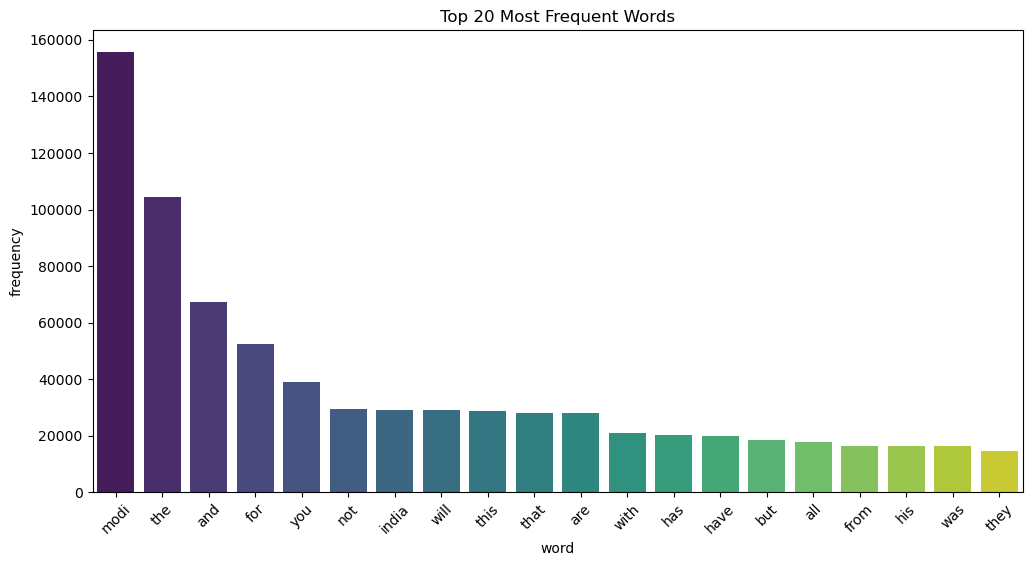

In [18]:
vectorizer = CountVectorizer(max_features=20)  # Top 20 frequent words
X = vectorizer.fit_transform(data['clean_text'])

word_freq = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# Create a DataFrame for easy plotting
import pandas as pd
freq_df = pd.DataFrame({'word': words, 'frequency': word_freq})

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=freq_df.sort_values(by="frequency", ascending=False), x='word', y='frequency', palette='viridis')
plt.title("Top 20 Most Frequent Words")
plt.xticks(rotation=45)
plt.show()
